In [32]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_pickle('bcad_propval_cleaned.pkl')
zcpi = pd.read_csv("./_py/zip2propID.csv", index_col='ZIPCode', header=0)
ZIPs = list(zcpi.index.values)

In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518870 entries, 5 to 6814
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Property ID        518870 non-null  int32 
 1   Geographic ID      518870 non-null  object
 2   Type               518870 non-null  object
 3   Property Address   518870 non-null  object
 4   Legal Description  518870 non-null  object
 5   Owner Name         518849 non-null  object
 6   Doing Business As  518870 non-null  object
 7   Appraised Value    518870 non-null  int64 
 8   Zipcode            518870 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 37.6+ MB


,Property ID,Geographic ID,Type,Property Address,Legal Description,Owner Name,Doing Business As,Appraised Value,Zipcode
count,5.188700e+05,518870,518870,518870,518870,518849,518870,5.188700e+05,518870
unique,NaN,516250,1,501272,516220,452628,1,NaN,70
top,NaN,04188-000-0012,Real,"16240 SAN PEDRO AVE SAN ANTONIO, TX 78232",CB 4188 P-1B ABS 168 (SOUTHSIDE STUDY AREA ...,CITY OF SAN ANTONIO,nan,NaN,78245
freq,NaN,34,518870,256,34,3542,518870,NaN,22662
mean,5.936400e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.028251e+05,NaN
std,3.102968e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.440528e+05,NaN
min,1.000110e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,NaN
25%,3.753992e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.145725e+05,NaN
50%,5.518465e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.721100e+05,NaN
75%,7.181288e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.425400e+05,NaN


array([[<AxesSubplot:title={'center':'Appraised Value'}>]], dtype=object)

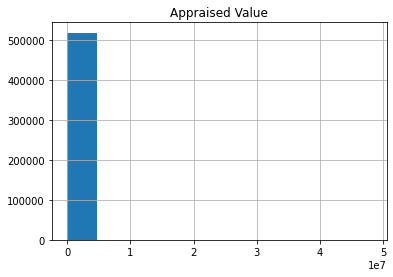

In [8]:
df.hist(column = 'Appraised Value')

In [23]:
df_mean = df['Appraised Value'].mean()
df_std = df['Appraised Value'].std()

hi_bnd = df_mean + 3*df_std
lo_bnd = df_mean - 3*df_std
lo_bnd = 10000 # if not, it's negative. But we chose this.
print(lo_bnd,hi_bnd)

10000 934983.4245676456


In [27]:
remove_hi = df[df['Appraised Value'] <= hi_bnd ]
remove_lo = remove_hi[remove_hi['Appraised Value'] >= lo_bnd]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503675 entries, 5 to 6814
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Property ID        503675 non-null  int32 
 1   Geographic ID      503675 non-null  object
 2   Type               503675 non-null  object
 3   Property Address   503675 non-null  object
 4   Legal Description  503675 non-null  object
 5   Owner Name         503655 non-null  object
 6   Doing Business As  503675 non-null  object
 7   Appraised Value    503675 non-null  int64 
 8   Zipcode            503675 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 36.5+ MB


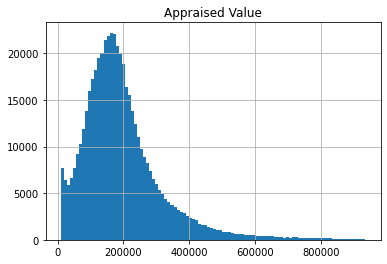

In [36]:
# Appraised Values Across Bexar Country 
remove_lo.hist(column='Appraised Value', bins=100)
remove_lo.info()

/home/kay/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


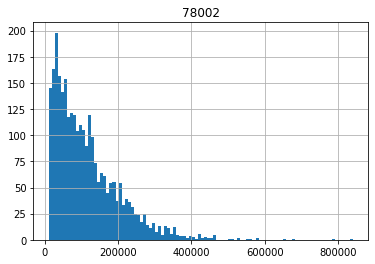

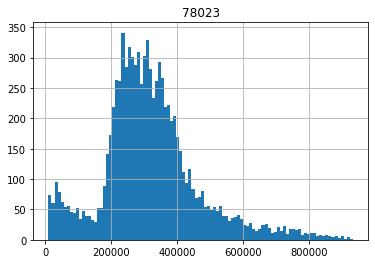

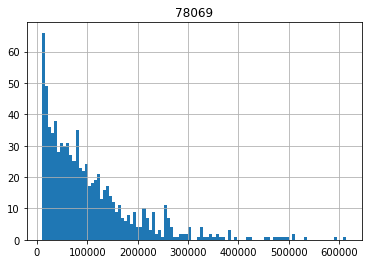

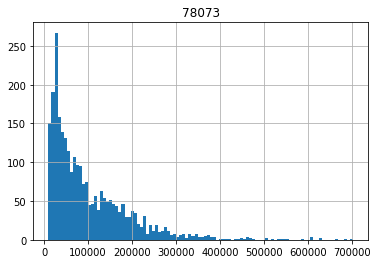

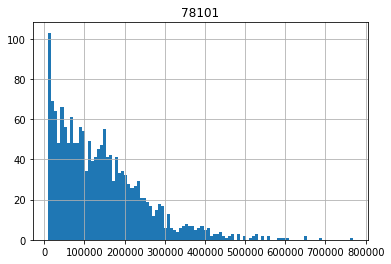

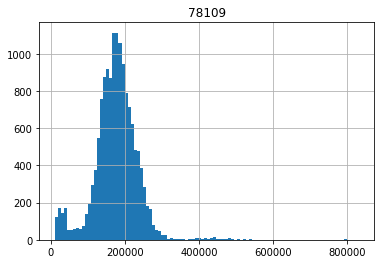

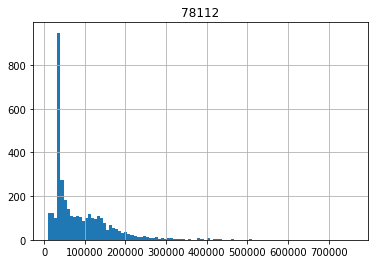

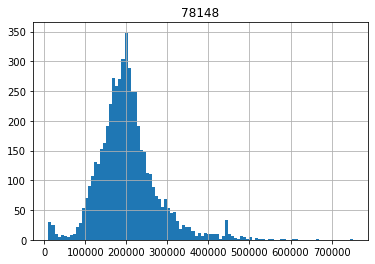

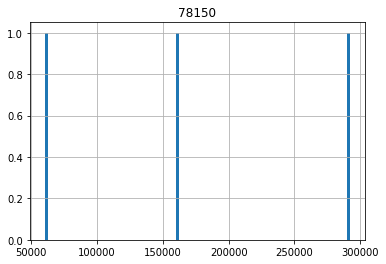

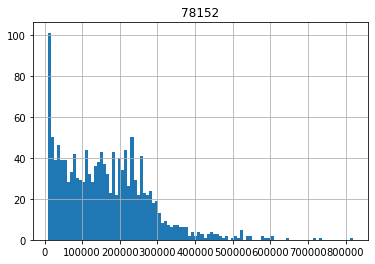

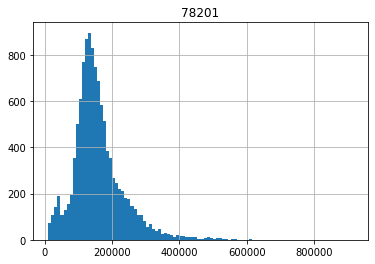

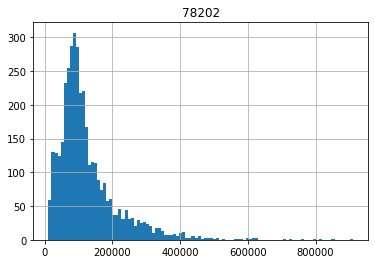

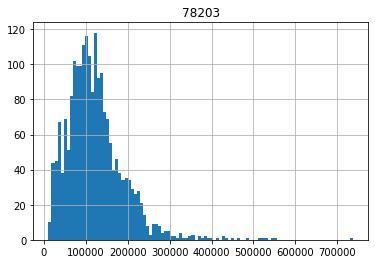

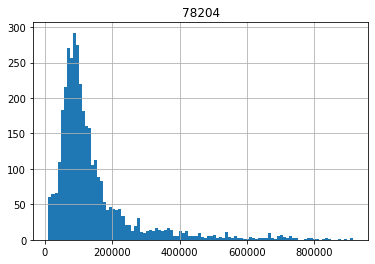

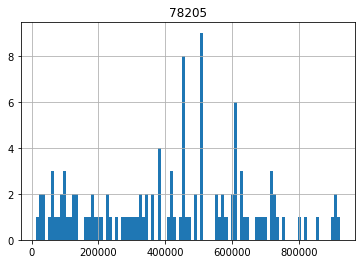

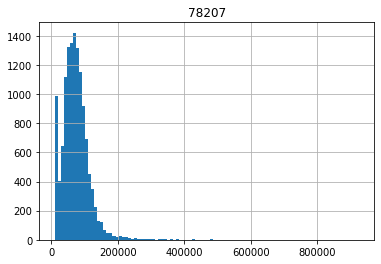

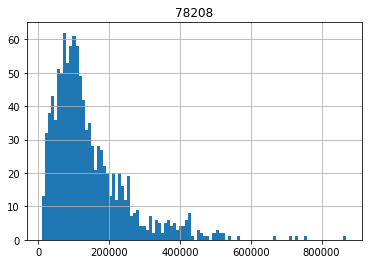

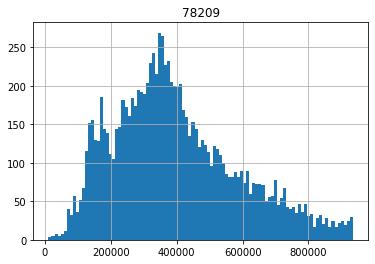

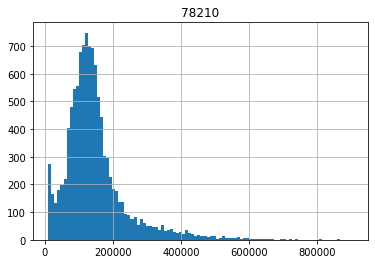

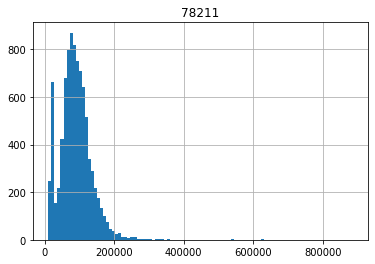

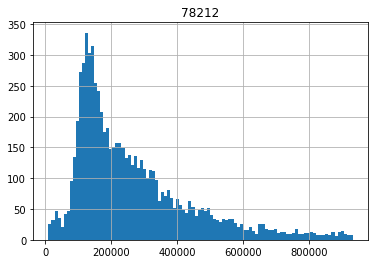

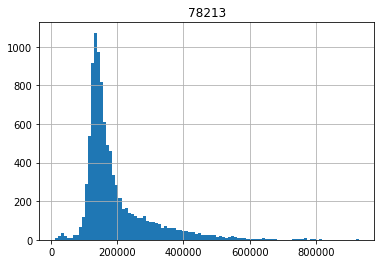

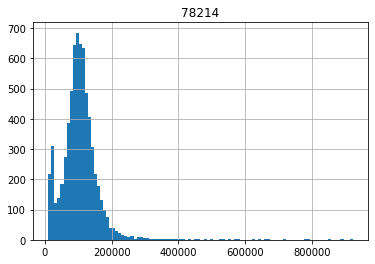

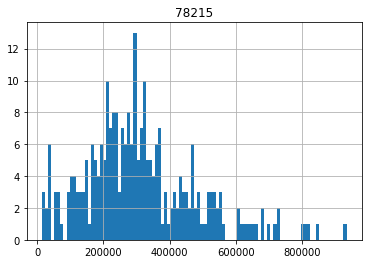

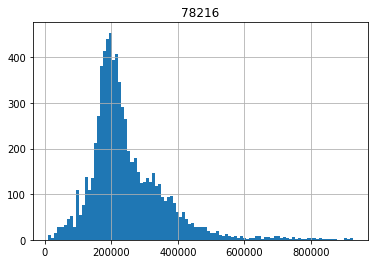

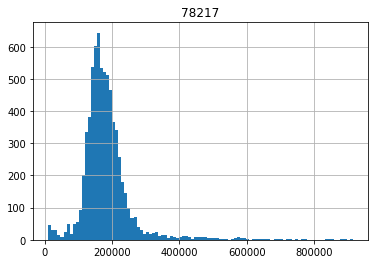

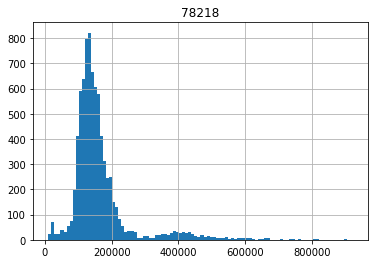

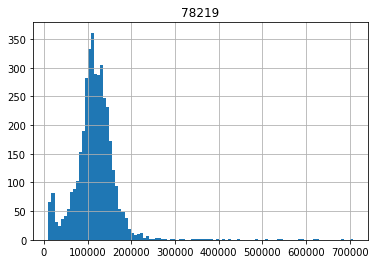

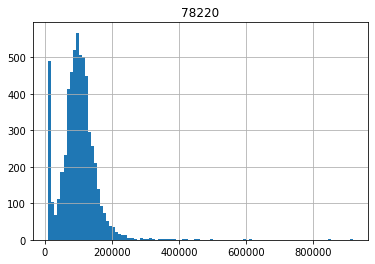

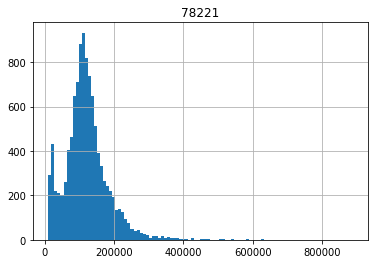

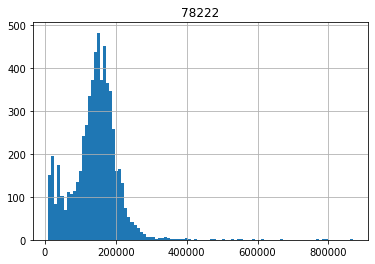

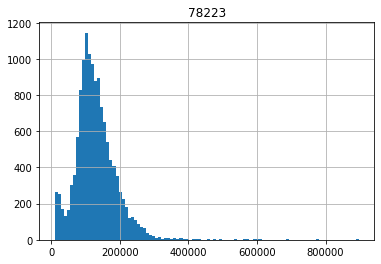

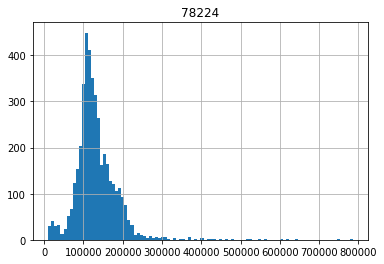

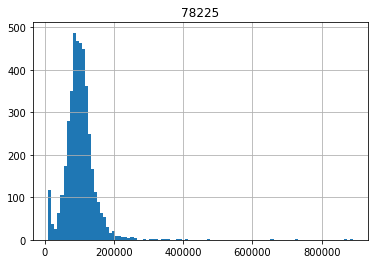

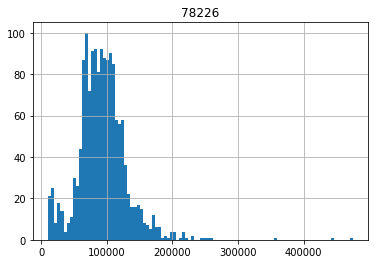

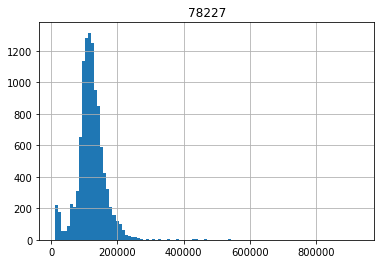

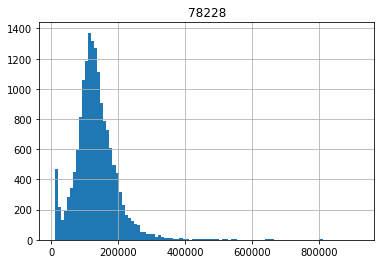

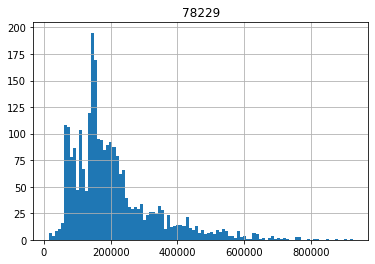

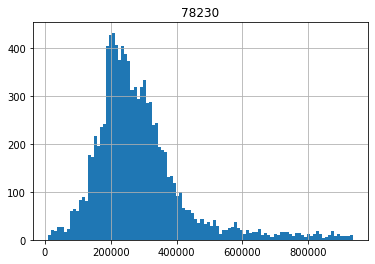

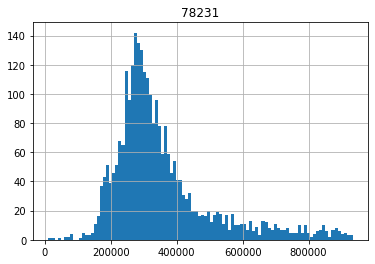

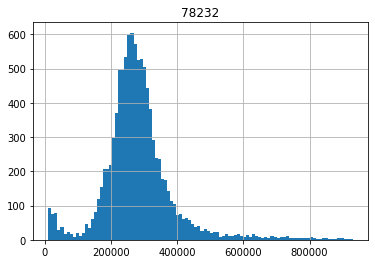

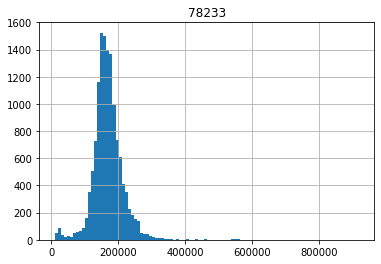

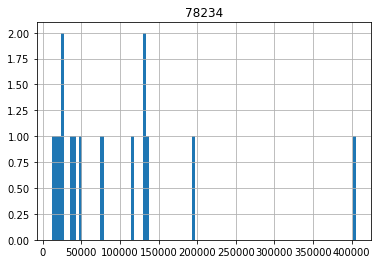

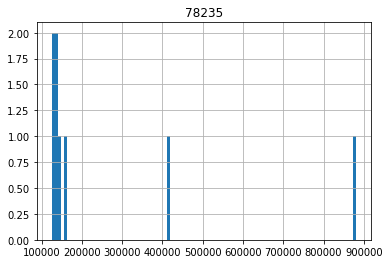

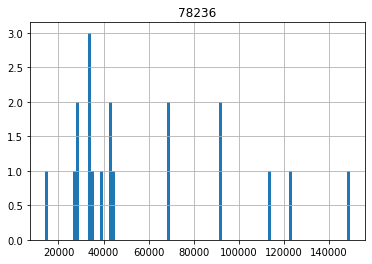

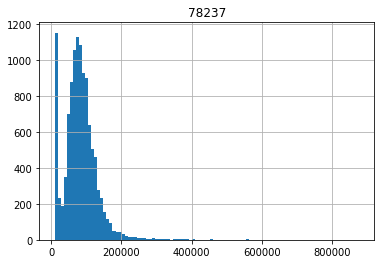

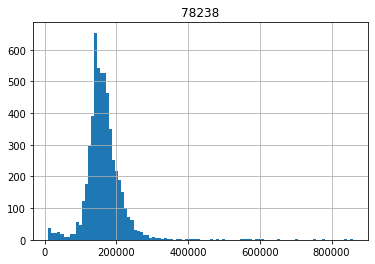

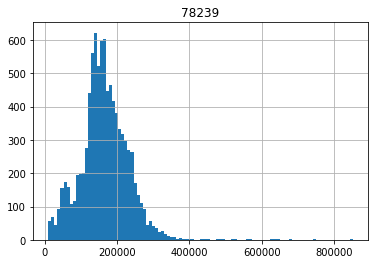

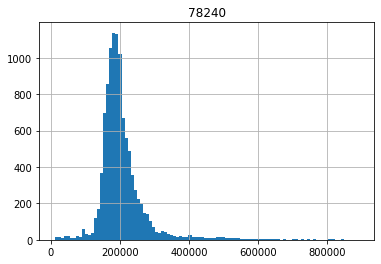

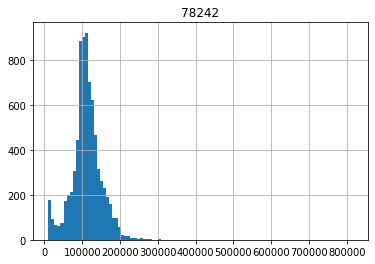

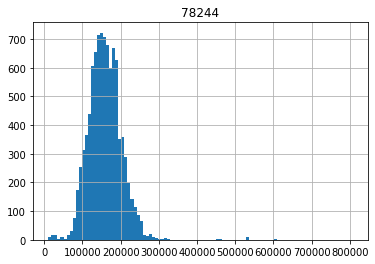

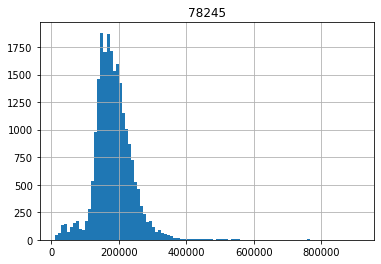

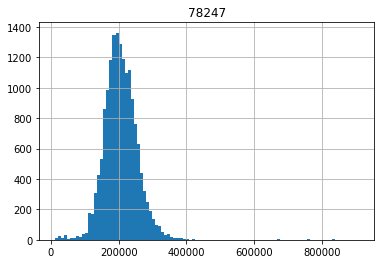

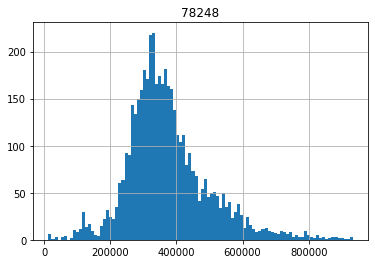

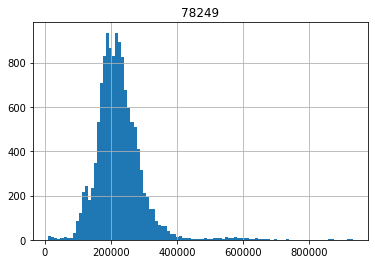

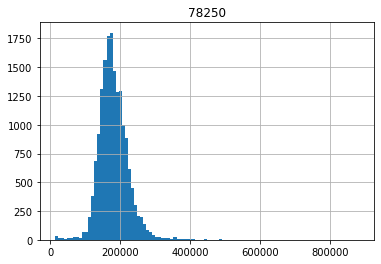

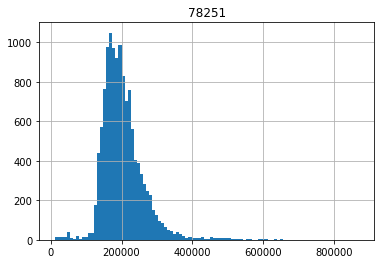

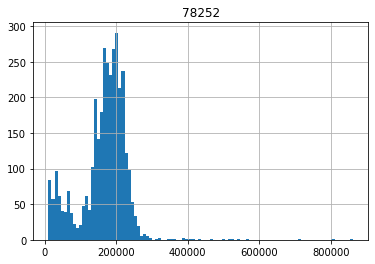

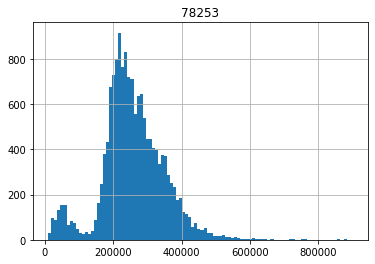

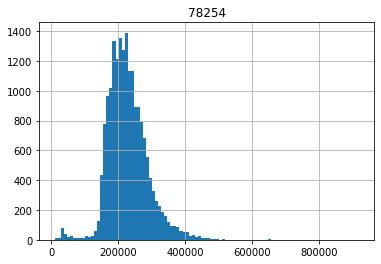

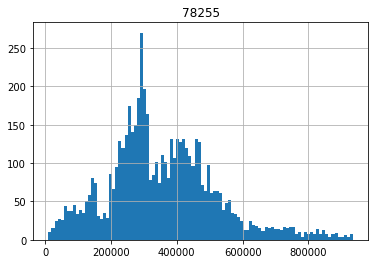

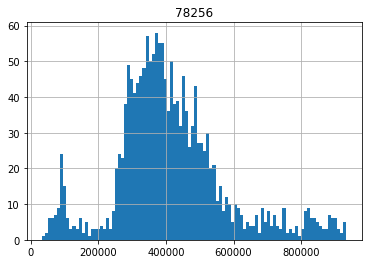

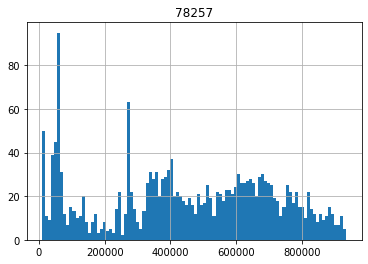

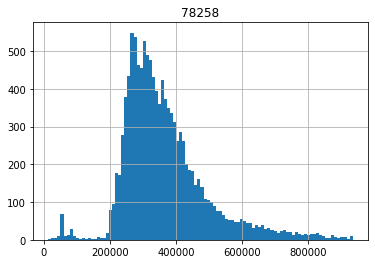

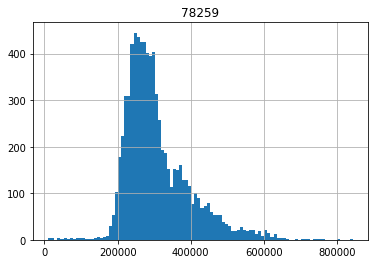

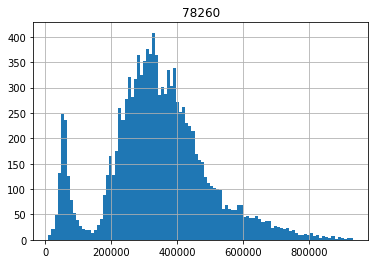

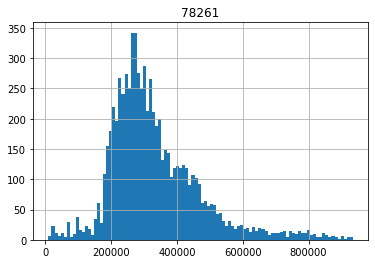

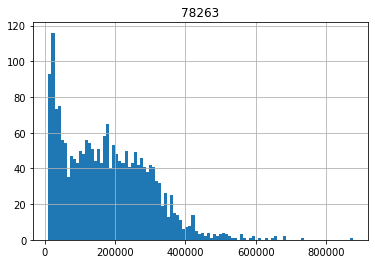

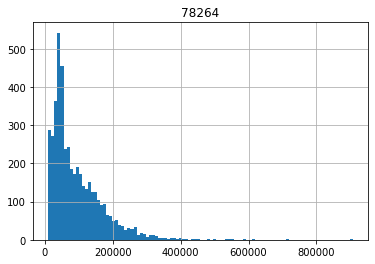

In [47]:
ZIPs = remove_lo['Zipcode'].unique() 

for oneZIP in ZIPs:
    remove_lo[remove_lo['Zipcode'] == str(oneZIP)].hist(column='Appraised Value', bins=100)
    plt.title(str(oneZIP))

[78002,
 78023,
 78069,
 78073,
 78101,
 78109,
 78112,
 78148,
 78150,
 78152,
 78201,
 78202,
 78203,
 78204,
 78205,
 78206,
 78207,
 78208,
 78209,
 78210,
 78211,
 78212,
 78213,
 78214,
 78215,
 78216,
 78217,
 78218,
 78220,
 78221,
 78224,
 78225,
 78226,
 78227,
 78229,
 78230,
 78231,
 78232,
 78234,
 78235,
 78236,
 78237,
 78241,
 78242,
 78243,
 78246,
 78247,
 78248,
 78250,
 78251,
 78252,
 78253,
 78259,
 78260,
 78262,
 78264,
 78269,
 78270,
 78275,
 78278,
 78279,
 78283,
 78284,
 78285,
 78286,
 78287,
 78288,
 78289,
 78292,
 78295,
 78298,
 78299]